### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon, chisquare
from scipy.stats import t
from math import sqrt
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


> **Independent variable**: Congruent or incongruent words (Binary)  
> **Dependent variable**: Time it takes to name the ink colors in equally-sized lists

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

> $$H_0: \mu^t_I - \mu^t_C = 0$$
> $$H_1: \mu^t_I - \mu^t_C \ne 0$$
>
>
> where $\mu^t_I$ is the average time for naming incongruent lists whereas $\mu^t_C$ depicts the average time needed to name congruent lists.
>
> In words:  
> __Null-Hypothesis__: The average time for naming incongruent words is the same as for congruent words.  
> __Alternative-Hypothesis__: The average time for naming incongruent words is different from the average time for naming congruent words. 

(2b) A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.

> In order to test, whether to reject the Null-Hypthesis or not, a __dependent (paired-samples) t-test for related groups__ is chosen in the context of this project. This has following reasons:  
> As the task has two conditions, each participant performed both conditions, meaning that not all samples are independent. Therefore, the experiment is a typical example for a within-subjects design and we cannot use an independent test.  
> Based on our hypotheses, we are choosing a __two-tailed p-value__, as two cases are theoretically possible: incongruent words are on average named slower than congruent words and incongruent words are on average named faster than congruent words.  
> The t-test requires the differences between dependent variables of the two groups to be normally distributed, however, having a large enough sample size (in this case $n=24$), under the central limit theorem the sample means of the differences are normally distributed (see bootstrap test).

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [38]:
df['Congruent'].mean(), df['Incongruent'].mean()

(14.051124999999999, 22.015916666666666)

In [39]:
df['Congruent'].std(), df['Incongruent'].std()

(3.5593579576451955, 4.7970571224691376)

> Looking at the mean, we can see, that the time for naming a congruent list is on average smaller ($\mu_C=14.05$) than for incongruent lists ($\mu_I=22.02$).
However, incongruent tasks have a larger standard deviation ($\sigma_I=4.80$) than congruent tasks ($\sigma_C=3.56$) which could indicate that some participants are more prone to the effect than others.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

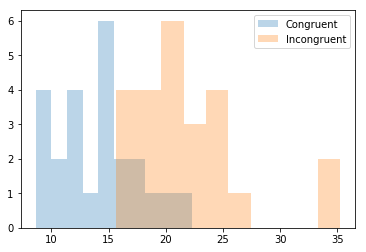

In [40]:
plt.hist(df['Congruent'], alpha=.3, label='Congruent')
plt.hist(df['Incongruent'], alpha=.3, label='Incongruent')
plt.legend();

> Looking at the distributions of the data, it can be clearly seen, that incongruent observations lie more right than congruent ones. None of the distributions seems normally distributed.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [41]:
#  bootstrap differences between congruent and incongruent samples
diffs = []
for _ in range(10000):
   b_sample = df.sample(df.shape[0], replace=True)
   diffs.append(b_sample.Incongruent.mean() - b_sample.Congruent.mean())

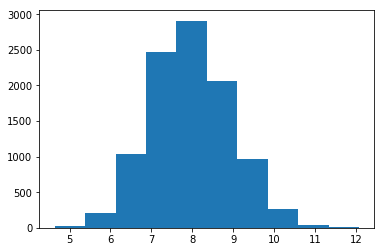

In [42]:
plt.hist(diffs);

In [43]:
# simulate distribution under the null
null_vals = np.random.normal(0, np.std(diffs), len(diffs))

In [44]:
# calculate observed difference in the experiment
obs_diff = df.Incongruent.mean() - df.Congruent.mean()
obs_diff

7.9647916666666667

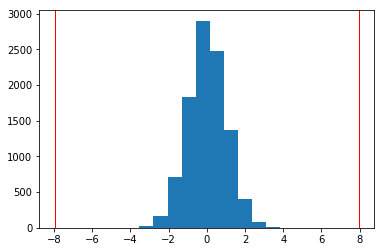

In [45]:
# plot observed difference if null is true
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red', linewidth=1);
plt.axvline(x=-obs_diff, color='red', linewidth=1);

In [46]:
# calculate p-value as the probability of observing the difference (or more extreme)
# in favour of the alternative from the null hypothesis if the null is true
((null_vals < -obs_diff).mean() + (null_vals > obs_diff).mean()).mean()

0.0

In [47]:
# Compute t-statistic
a = df['Incongruent']
b = df['Congruent']

(a.mean() - b.mean()) / ((a - b).std()/sqrt(df.shape[0]))

8.020706944109957

Run t-test to double check the result of the hypothesis test:

In [48]:
ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

WilcoxonResult(statistic=0.0, pvalue=1.821529714896801e-05)

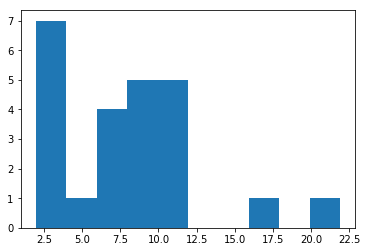

In [49]:
# Additionally, test with Wilcoxon test,
# which is a non-parametric version of the paired T-test
plt.hist(a - b)
wilcoxon(df['Incongruent'], df['Congruent'])

In [50]:
# Critical t-score for: n=24, p<0.05, 2-tail (alpha/2=0.025)
t.ppf(1-0.025, df.shape[0])

2.0638985616280205

> Given the default confidence level of 0.95 we reject the Null-Hypothesis. The t-statistic states, that the two groups are 8.02 (> 2.06) times different from each other.  
> Also the Wilcoxon test, which is a non-parametric version of the paired T-test shows significant difference between the times.
> From the results of the experiment we can conclude that given incongruent words, participants take significantly more time to name the list. The results were as expected, as incongruent samples lead to confusion and hence require more time to solve.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

> It is likely that, due to increased confusion during the incongruent tasks, it takes more time to solve them. The Stroop effect can also be conducted e.g. in a numerical manner, where congruent numbers relate to their actual character size. For example, the font size of a 5 is larger than a 3 in the congruent case and vice versa in the incongruent case.

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test a Perceptual Phenomenon.ipynb'])

0